# Happy Markov Models (HMM)

In this article, we are going to generate new words that statistically sound positive. To do so, we are going to use a set of words gathered from a large number of positive reviews found on the internet [1, 2] and using a Hidden Markov Model (HMM).

With HMM we will be able to create a language model which will define how positive words are composed, at least how they are statistically composed.

To get things even simpler, we are going to use an existing Python package to work with HMMs developed by my own [3].

## What are Markov Chains and HMMs?

Markov Chains models the way of moving from a determined state $a$ to another state $b$. Each transition has a probability $p_{ab}$ associated meaning how likely is moving from $a$ to $b$. A Markov chain makes a very strong assumption that if we want to predict the future in the sequence, all that matters is the current state (See Equation 1)[4]. 

$P(q_i=a|q_{i-1}) $

*Equation 1: Markov assumption*

Figure 1 shows an example of how a Markov Chain looks like.

![Markov Chain figure](https://raw.githubusercontent.com/Guillem96/jax-hidden-markov-model/img/mdp.jpg)
*Figure 1. Markov chain (Slide comming from Berkeley Reinforcement Learning course)*

The HMM is based on augmenting the Markov chain framework. A Markov chain is useful when we need to compute a probability for a sequence of observable events, but sometimes we cannot see what is happening under the hoods. Imagine, that every day, we see a different animal, for instance, the first day we see an ant, the second day a snail, and finally a white fox (Figure 2). What is happening here? Does seeing an ant modifies the probability a snail the following day? It doesn't, what is modifying the probabilities is the weather. Depending on if it is sunny, rainy or snowy we the probabilities of seeing a specific animal varies.

![HMM Animals example](https://raw.githubusercontent.com/Guillem96/jax-hidden-markov-model/img/HMM Example.png)

*Figure 2. HMM animals example*

An HMM allows us to talk about both observed events(like the animals) and hidden events (like like the weather) that we think of as causal factors in our probabilistic model.  An HMM is specified bythe following components:

- $Q = q_1, q_2, q_3, ...$: The set of possible hidden states (Sunny, rainy and snowy)
- $O = o_1, o_2, o_3, ...$: A sequence of **observations** sampled from a vocabulary $V$(White Fox, Snail and Ant)
- $\pi = \pi_1, \pi_2, \pi_3,...$: The probability distribution of starting at a determined hidden state.
- $A = a_{ij}$: **Transition probabilities**. Matrix that at position $ij$ we find the probability of going from $q_i$ to $q_j$
- $ B = b_i(o_t) $: **Emission probabilities**. Probability of observing $o$ being at state $i$ at timestep $t$

As Linus would say: *Talk is cheap, show me code*. And this is exactly what I am going to show you. We are going to learn how to formalize the animals example with my own HMM Python package.

In [1]:
import hmm
import jax.numpy as np

# Decalre the name of the possible Hidden States Q
Q_names = ['Sunny', 'Rainy', 'Snowy']

# Define the vocabulary of Observations
V = ['Ant', 'Snail', 'White Fox']

# Define transition probs
A = np.array([[0.6, 0.3, 0.1],
              [0.4, 0.4, 0.2],
              [0.1, 0.4, 0.5]])

B = np.array([[0.8, 0.2, 0.0],
              [0.1, 0.6, 0.3],
              [0.0, 0.1, 0.9]])

pi = np.array([.3, .3, .4])

animals_hmm = hmm.HiddenMarkovModel(A=A, B=B, pi=pi)

/mnt/c/Users/Guillem/Desktop/projects/jax/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


May be at this point the code above is a bin unclear, but if we plot what we have declared the things will become a lot clearer.

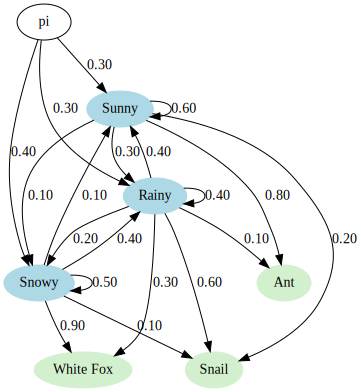

In [2]:
animals_hmm.draw(Q_names, V)

Looking at the plot we can see the probabilities ($\pi$) of starting at specific hidden state, the transition probabilites and the emission probabilities being at each hidden state.

That's all for the Hidden Markov Models introduction. If you want to learn more about them, IMO this [4] notes are a pretty good resource.

Now lets move on to our use case of creating positive *soundish* words.

## Preprocessing corpus

## References

[1] Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
       Proceedings of the ACM SIGKDD International Conference on Knowledge 
       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
       Washington, USA, 

[2] Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
       and Comparing Opinions on the Web." Proceedings of the 14th 
       International World Wide Web conference (WWW-2005), May 10-14, 
       2005, Chiba, Japan.

[3] Guillem96 - [Implementation of Hidden Markov Models using JAX](https://github.com/Guillem96/jax-hidden-markov-model)

[4] Daniel Jurafsky & James H. Martin - [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/A.pdf)